# MLflow Notes


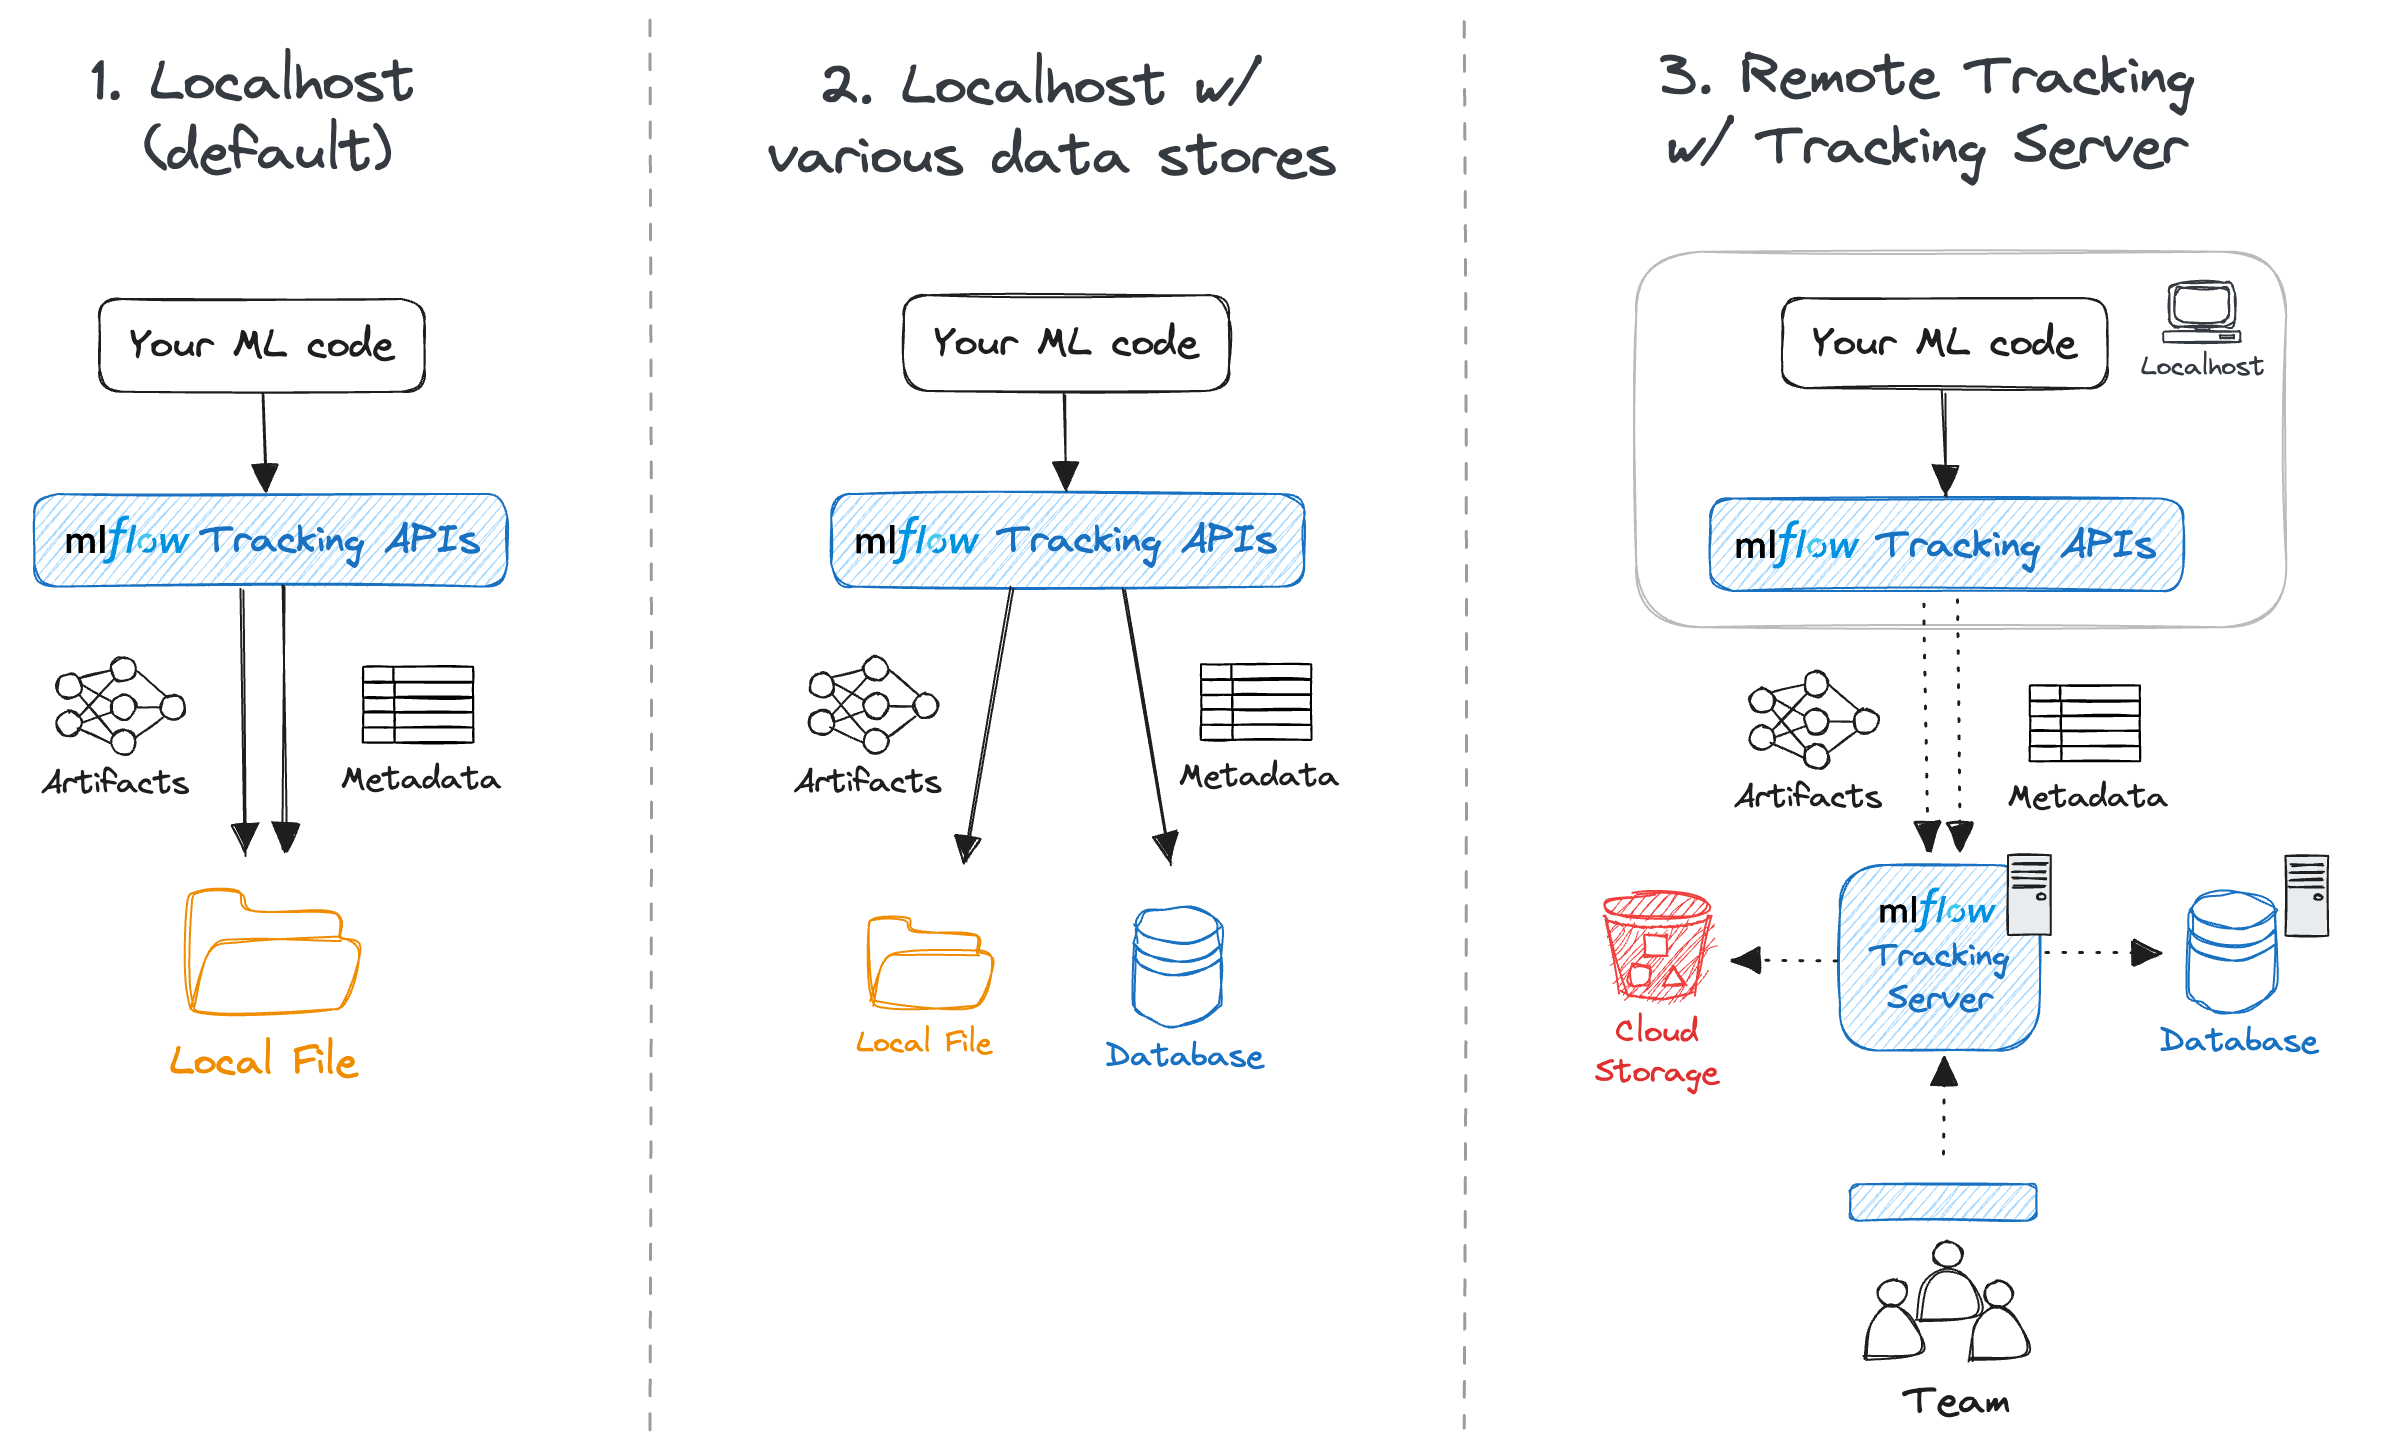

## Concept guide

Content from the section is copied from the following notebook: https://colab.research.google.com/drive/1xeoZku-rQDtVkLGy8RNeITvrA-Y92OvN#scrollTo=dIO-Angr0vSJ

### 🧩 The MLFlow Components:

**Components that MLFlow offers to help you manage your workflow :**
- **MLflow Tracking -** Log parameters, metrics, and artifacts when running a machine learning code.
- **MLflow Projects** - Package and reuse data science code.
- **MLflow Registry -** Manage the lifespan of ML Model.
- **MLflow Models** - Package and deploy ML models.
dels.

### 🏃‍♂️& 🧪 Understanding Runs & Experiments

- The **experiment** unit in MLflow can be handled as a "project" or as a "approach".  
- The term **run** merely refers to a run or execution of a code once.

*More than one run might be associated with a single experiment.*

Each run is an execution of your data science code which records the following:

- **Source of execution**: Contains the hash of the commit if the code was pushed to GitHub and the original line of code that was utilized for the run.
- **Artifacts**: Artifacts are output files recorded during a run. 
- **Parameters**: Parameters are stored in the key-value format.
- **Metrics:** The evaluation metrics such as RMSE or ROC-AUC are recorded in a run as well.

### ✍️ How and where are the runs recorded?

*Runs of MLflow can be stored locally in files, remotely on a tracking server, or in a database that is compatible with [SQLAlchemy](https://www.sqlalchemy.org/) - an open-source SQL toolkit and object-relational mapper for the Python programming language.*

#### Scenario 1: MLflow on localhost
- A good first-time technique to get started.
- MLflow will create a directory called **./mlruns** on your local system as soon as you import MLflow and log an artifact.
- Limitations on collaboration because experiments or results can't be shared with a team.
- Tracking UI - To visualize, search and compare runs, as well as download run artifacts or metadata for analysis in other tools by running the command `mlflow ui`.
<center> <img src="https://drive.google.com/uc?id=182URyB-0ezmZCkQg-TKVrt-OmYbiyECM" height="150%"/>
</center>

The UI contains the following key features:

- Experiment-based run listing and comparison (including run comparison across multiple experiments)
- Searching for runs by parameter or metric value
- Visualizing run metrics
- Downloading run results

#### Scenario 2: MLflow on localhost with SQLite

The only difference between this process and the previous one is that we use a local database such as SQLite instead of storing runs to files.

#### Scenario 3: MLflow on localhost with Tracking Server

This scenario is again similar to the first scenario but here, you can setup a remote server using `mlflow server <args>` which will launch the tracking server at the default port 5000.


#### Scenario 4: MLflow with remote Tracking Server, backend and artifact stores
- The tracking server, backend store, and artifact store may all be located on different hosts in distributed architectures.
- The MLflow client communicates with the tracking server through a sequence of REST requests in order to record all runs' MLflow entities. 
- The MLflow client interacts with the remote Tracking Server and artifact storage host such as AWS using the boto client libraries, and uploads the artifacts to the S3 bucket URI location.
- This set up requires DevOps knowledge

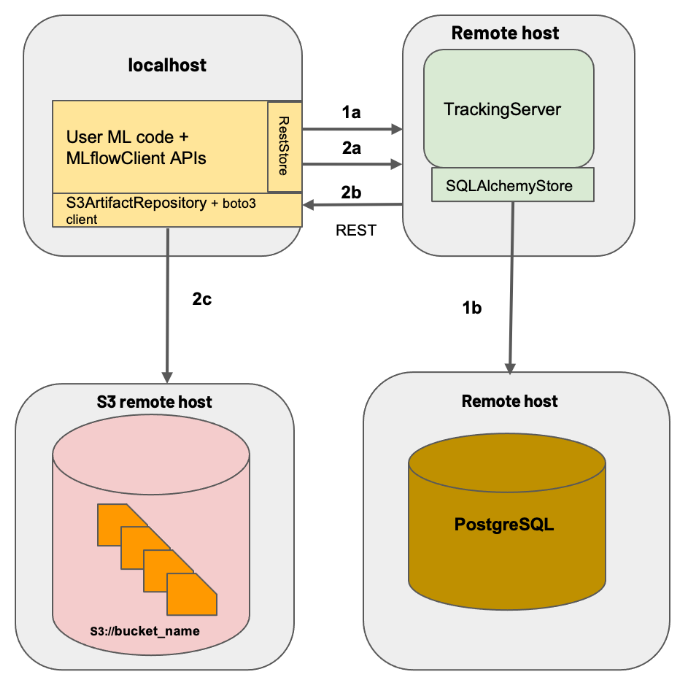

#### Scenario 5: MLflow Tracking Server enabled with proxied artifact storage access


*In this case, it is not necessary to grant end users direct path access to a remote object store (such as S3, ADL, GCS, or HDFS) for the management of artifact, nor is it necessary for an end user to provide access credentials.* 

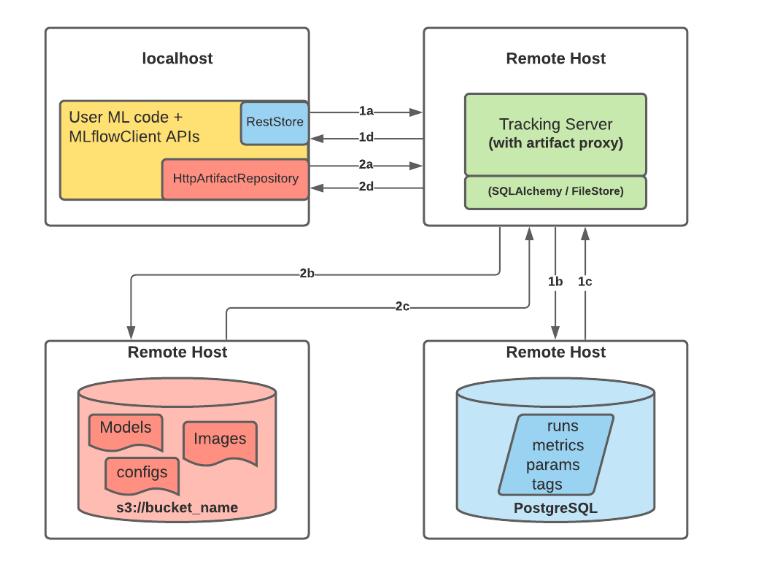

`mlflow server`: Check current running server, running this cmd under different directory in the command prompt will direct you to different dashboard, since it may be accessing different 'mlrun' directory in your local device <br>
`mlflow server --host 127.0.0.1 --port 8080`: Set up tracking server (--port set up port number) <br>
`mlflow ui`: Link to the ui dashboard 


#### Scenario 6: MLflow x DagsHub

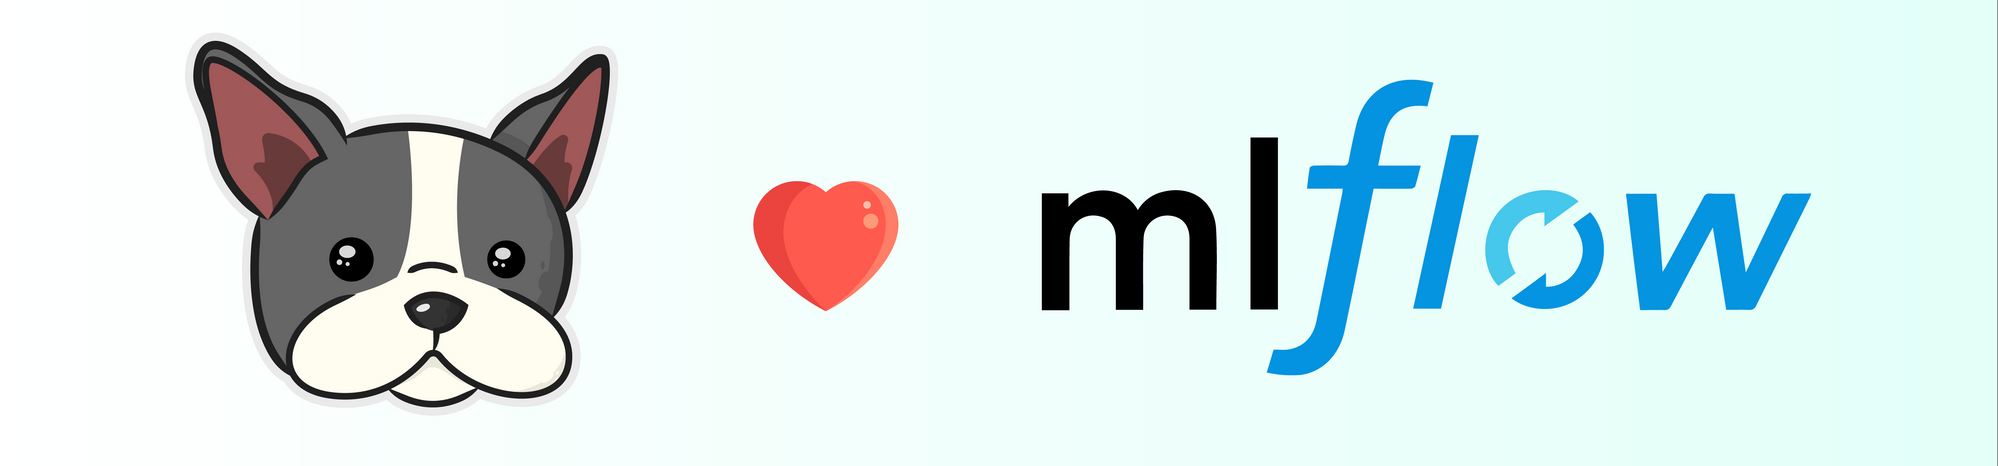

- Going through all the above can be a bit of an hassle, even for people with DevOps background. To simplify the process, DagsHub decided to do the MLOps heavy lifting for you.

- **DagsHub provides a free remote MLflow server with every repository.**

- You can log experiments with MLflow to it, view its information under the [experiment tab](https://dagshub.com/docs/feature_guide/discovering_experiments/), and manage your trained models from the full-fledged MLflow UI built into your DagsHub project.

- When you create a repository on DagsHub, a remote MLflow server is automatically created and configured with the project. The repository's MLflow tracking server will be located at:

  `https://dagshub.com/<DagsHub-user-name>/<repository-name>.mlflow`

## Setting/Connecting servers and experiments

https://mlflow.org/docs/latest/tracking/server.html

#### Connect to local host

In [ ]:
# make sure your host and port number matches
mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")
client = MlflowClient(tracking_uri="http://127.0.0.1:8080")

**You can connect mlflow in CLI as follows**

Mac/Linux/Unix <br>
`export MLFLOW_TRACKING_URI=http://127.0.0.1:8080` 

Windows <br>
`$env:MLFLOW_TRACKING_URI="http://127.0.0.1:8080"`

#### Create an experiment

In [ ]:
experiment_description = (
    "Write your description here."
)

# You can set your own experiment tags here
experiment_tags = {
    "project_name": "the project name",
    "your tags": "value",
    "mlflow.note.content": experiment_description,
}

client.create_experiment(name="experiment_name", tags=experiment_tags) # cannot create experiment if experiment name already exist

#### Search for an experiment

In [ ]:
all_experiments = client.search_experiments()
# search with tagging
apples_experiment = client.search_experiments(
    filter_string="tags.`project_name` = 'grocery-forecasting'" 
)

#### Set an experiment

In [ ]:
apple_experiment = mlflow.set_experiment("Apple_Models") # name of your experiment

## Runs configurations

#### Initialize the run

In [ ]:
# If this is not set, a unique name will be auto-generated for your run, noted that two runs can have the same name
run_name = "apples_rf_test"

with mlflow.start_run(run_name=run_name) as run:
    print(run.info.run_id) # run id of the current run

#### Log params and metrics

Key-value pairs

In [ ]:
params = {"solver": "lbfgs", "max_iter": 1000, "multi_class": "auto", "random_state": 8888} #key-value pair
mlflow.log_params(params)
mlflow.log_param("solver", "lbfgs")


mlflow.log_metrics(metrics) # key-value pair similar to logging params

#### Log artifact

You can log local directories to mlflow as an artifact

In [ ]:
mlflow.log_artifact('local directory path')

#### Set tag

key-value pairs

In [ ]:
mlflow.set_tag("Training Info", "Basic LR model for iris data")

#### Set signature

In MLflow, a signature refers to the description of the input and output parameters of a machine learning model or function. It **defines the expected data types and shapes of the inputs and outputs**, allowing MLflow to infer and validate the inputs and outputs when serving the model.

In [ ]:
# part of the parameter in log_model, see below
signature = infer_signature(X_train, lr.predict(X_train))

#### Manually log the model

In [ ]:
model_info = mlflow.sklearn.log_model(
    sk_model=lr, # the trained model
    artifact_path="iris_model", # name of the artifact
    signature=signature,
    input_example=X_train,
    registered_model_name="tracking-quickstart", # the model will not be registered if you didn't set the parameter
    # but you can register the model manually in the dashboard on the right hand side of the screen "Register Model"
)

#### Autolog

The mlflow.autolog() function is a convenient feature provided by MLflow that automatically logs several aspects of your machine learning code and environment during training or model fitting. It helps simplify the process of tracking and recording important information without the need for explicit logging statements.

In [ ]:
# Enable automatic logging
mlflow.autolog()
# disable autolog
mlflow.autolog(disable=True) 

# Start an MLflow run
with mlflow.start_run():

    # Create and fit a scikit-learn model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # The metrics, parameters, artifacts, and model are automatically logged

#### Query runs

In [ ]:
client = mlflow.tracking.MlflowClient()
experiment_id = "0" # experimental id, 0 refers to experiment 'Default'
best_run = client.search_runs(
    experiment_id, order_by=["metrics.val_loss ASC"], max_results=1
)[0]
print(best_run.info)
# {'run_id': '...', 'metrics': {'val_loss': 0.123}, ...}

#### Creating Child runs

https://mlflow.org/docs/latest/tracking/tracking-api.html#creating-child-runs

You can also create multiple runs inside a single run. This is useful for scenario like hyperparameter tuning, cross-validation folds, where you need another level of organization within an experiment. You can create child runs by passing parent_run_id to mlflow.start_run() function. For example:
The nested runs inherit properties from the parent run, such as the experiment ID, tags, and the run's lifecycle. However, they have their own unique run ID and can have their own set of metrics, parameters, and artifacts.

By utilizing nested runs, you can have a hierarchical structure that provides a more detailed view of your experiment, making it easier to analyze and compare different iterations or variations.


In [ ]:
# Start parent run
with mlflow.start_run() as parent_run:
    param = [0.01, 0.02, 0.03]

    # Create a child run for each parameter setting
    for p in param:
        with mlflow.start_run(nested=True) as child_run:
            mlflow.log_param("p", p)
            ...
            mlflow.log_metric("val_loss", val_loss)

#### Parellel runs - Multiprocessing

https://mlflow.org/docs/latest/tracking/tracking-api.html#parallel-runs

In [ ]:
import multiprocessing as mp

def train_model(params):
    with mlflow.start_run():
        mlflow.log_param("p", params)
        ...

if __name__ == "__main__":
    params = [0.01, 0.02, ...]
    pool = mp.Pool(processes=4)
    pool.map(train_model, params)

#### Parellel runs - Multithreading

https://mlflow.org/docs/latest/tracking/tracking-api.html#parallel-runs

#### Add tags to run - for better organization

https://mlflow.org/docs/latest/tracking/tracking-api.html#adding-tags-to-runs

## Model Registry and Versioning

**Noted that a lot of the functions can be done manually in the mlflow ui**

https://mlflow.org/docs/latest/model-registry.html

#### Manually registering a model

In [ ]:
# Select a subpath name for the run
subpath = "world_1-1"

# Select a name for the model to be registered
model_name = "Cool Mario Model"

# build the run URI
run_uri = f'runs:/{run_id}/{subpath}'

# register the model with register_model
model_version = mlflow.register_model(run_uri, model_name)

# register the model with create_registered_model
model_version = mlflow.create_register_model(run_uri, model_name)

# The difference is that create_registered_model will throw error if there already exist model of same name
# while register_model will create a new version under that particular model

#### Deleting a model

In [ ]:
client = MlflowClient()

# delete a particular version
client.delete_model_version(name="name of your model", version=1)

# delete all versions
client.delete_registered_model(name="name of your model")

#### Searching for a model

https://mlflow.org/docs/latest/model-registry.html#listing-and-searching-mlflow-models

In [ ]:
client = MlflowClient()

# search for a model
for rm in client.search_registered_models():
    pprint(dict(rm),indent=4)

# search for a version of a model
for mv in client.search_model_versions("name='name of your model'")
    pprint(dict(mv), indent=4)

#### Get latest version of a model

In [ ]:
client = MlflowClient()
client.get_latest_versions("name of your model", stages=["Staging"])[0] #you can set the stages parameter

#### Model tagging and aliases

https://mlflow.org/docs/latest/model-registry.html#deploy-and-organize-models-with-aliases-and-tags

#### Registering a Model Saved Outside MLflow

https://mlflow.org/docs/latest/model-registry.html#registering-a-model-saved-outside-mlflow